In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
label_df = pd.read_csv('/content/drive/My Drive/tech_variable/crowd/labels.csv')
label_df.columns = ['id' , 'people']
label_df.head()

,id,people
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [ ]:
img = np.load('/content/drive/My Drive/tech_variable/crowd/images.npy')
img.shape


(2000, 480, 640, 3)

In [ ]:
labels = np.array(label_df['people'])
labels

array([35, 41, 41, ..., 25, 26, 26])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(img, labels, test_size=0.2)
print(x_train.shape[0])
print(x_test.shape[0])

1600
400


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3),padding='same',input_shape=(480,640,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(8,(3,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 480, 640, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 240, 320, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 240, 320, 32)      18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 120, 160, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 160, 16)      4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 60, 80, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 80, 8)        

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32)

Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 968s 605ms/step - loss: 169915.5805 - mae: 203.1494 - val_loss: 142.9873 - val_mae: 9.4728
Epoch 2/30
1600/1600 [==============================] - 976s 610ms/step - loss: 641.0031 - mae: 19.7864 - val_loss: 173.2629 - val_mae: 11.3428
Epoch 3/30
1600/1600 [==============================] - 977s 611ms/step - loss: 253.1555 - mae: 12.5933 - val_loss: 210.7934 - val_mae: 13.2659
Epoch 4/30
1600/1600 [==============================] - 976s 610ms/step - loss: 182.8930 - mae: 10.8506 - val_loss: 238.1368 - val_mae: 14.5469
Epoch 5/30
1600/1600 [==============================] - 971s 607ms/step - loss: 146.5054 - mae: 9.4582 - val_loss: 107.4008 - val_mae: 9.2714
Epoch 6/30
1600/1600 [==============================] - 966s 604ms/step - loss: 129.7811 - mae: 8.9555 - val_loss: 115.8455 - val_mae: 9.7929
Epoch 7/30
1600/1600 [==============================] - 966s 604ms/step - loss: 112.7612 -

In [ ]:
model_json = model.to_json()
with open("/content/drive/My Drive/tech_variable/model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save('/content/drive/My Drive/tech_variable/final_model2.h5')

In [ ]:
from PIL import Image, ImageFile
from IPython.display import display

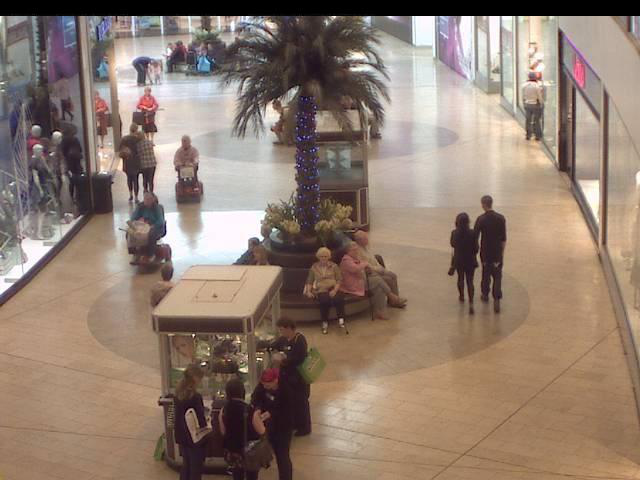

(1, 480, 640, 3)
20


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np

img = load_img('/content/drive/My Drive/tech_variable/crowd/frames/frames/seq_001692.jpg',target_size=(480,640))
display(img)
img = np.array(img)
# img = np.resize(img,(480,640,3))
# print(img.shape)
img = img[np.newaxis,:]
print(img.shape)
model = load_model('/content/drive/My Drive/tech_variable/final_model2.h5')
result = model.predict(img)
print(int(result))